#Data Source

In [15]:
import urllib.request

def get_data():
    import urllib.request

    odom_data_url = "https://raw.githubusercontent.com/rodrigodg1/inspection-framework/main/charts/odom.txt"
    response = urllib.request.urlopen(odom_data_url)
    odom_data = response.read().decode()

    imu_mag_data_url = "https://raw.githubusercontent.com/rodrigodg1/inspection-framework/main/charts/imu_mag.txt"
    response = urllib.request.urlopen(imu_mag_data_url)
    imu_mag_data = response.read().decode()

    imu_data_url = "https://raw.githubusercontent.com/rodrigodg1/inspection-framework/main/charts/imu_data.txt"
    response = urllib.request.urlopen(imu_data_url)
    imu_data = response.read().decode()

    imu_angular_velocity_url = "https://raw.githubusercontent.com/rodrigodg1/inspection-framework/main/charts/imu_angular.txt"
    response = urllib.request.urlopen(imu_angular_velocity_url)
    imu_angular_velocity = response.read().decode()

    return odom_data, imu_mag_data, imu_data, imu_angular_velocity


#Data Loading

In [16]:
odom_data, imu_mag_data, imu_data, imu_angular_velocity = get_data()

#Data Frame

In [17]:
import sys
import pandas as pd

def calculate_header_sizes(data,data_type):

    headers = data.strip().split('---')
    header_sizes = [sys.getsizeof(header) for header in headers if header]

    total_header_count = data.count('header:')
    print(f"{data_type} - Total number of 'header' keyword occurrences: {total_header_count}")

    header_sizes_df = pd.DataFrame(header_sizes)
    header_sizes_df.columns = ['Header Size']
    header_sizes_df.index.name = 'Header Index'
    print(f"{data_type} - Statistics")
    print(header_sizes_df.describe())
    print("\n")

    return header_sizes_df

odom_data, imu_mag_data, imu_data, imu_angular_velocity = get_data()

odom_header_sizes_df = calculate_header_sizes(odom_data,"Odometry")
imu_data_header_sizes_df = calculate_header_sizes(imu_data,"IMU_Data")
imu_mag_header_sizes_df = calculate_header_sizes(imu_mag_data,"IMU_Mag")
imu_angularv_header_sizes_df = calculate_header_sizes(imu_angular_velocity,"IMU_AngularV")


Odometry - Total number of 'header' keyword occurrences: 248
Odometry - Statistics
       Header Size
count   248.000000
mean    921.362903
std      14.895770
min     910.000000
25%     913.000000
50%     914.000000
75%     918.500000
max     952.000000


IMU_Data - Total number of 'header' keyword occurrences: 994
IMU_Data - Statistics
       Header Size
count   994.000000
mean    693.084507
std       3.392561
min     683.000000
25%     690.000000
50%     694.000000
75%     696.000000
max     701.000000


IMU_Mag - Total number of 'header' keyword occurrences: 4971
IMU_Mag - Statistics
       Header Size
count  4971.000000
mean    231.170992
std       1.498803
min     226.000000
25%     230.000000
50%     231.000000
75%     232.000000
max     236.000000


IMU_AngularV - Total number of 'header' keyword occurrences: 994
IMU_AngularV - Statistics
       Header Size
count   994.000000
mean    234.062374
std       2.294117
min     226.000000
25%     233.000000
50%     234.000000
75%     2

#ROS Messages Size (Transaction Data)

Total Records: 248
[912, 913, 950, 913, 913, 913, 913, 913, 913, 914, 914, 914, 914, 914, 914, 914, 914, 914, 914, 914, 914, 914, 914, 914, 914, 914, 914, 914, 914, 914, 914, 914, 947, 949, 913, 913, 913, 913, 913, 913, 913, 913, 913, 913, 913, 913, 913, 913, 913, 913, 913, 913, 913, 913, 913, 913, 913, 950, 914, 949, 913, 913, 913, 913, 913, 913, 913, 913, 913, 952, 914, 914, 914, 914, 914, 914, 914, 914, 914, 948, 912, 912, 912, 912, 948, 912, 912, 912, 949, 913, 913, 913, 913, 913, 913, 913, 913, 913, 951, 914, 914, 914, 914, 914, 948, 952, 914, 914, 914, 914, 914, 914, 914, 914, 914, 914, 914, 914, 914, 914, 949, 913, 913, 952, 950, 913, 930, 912, 912, 951, 914, 914, 948, 912, 912, 912, 912, 912, 951, 933, 914, 914, 914, 914, 914, 914, 914, 914, 914, 914, 914, 914, 914, 914, 949, 949, 912, 912, 912, 947, 911, 911, 911, 911, 911, 948, 912, 912, 912, 912, 912, 912, 912, 912, 949, 951, 915, 915, 915, 915, 915, 915, 915, 951, 931, 913, 951, 914, 933, 950, 913, 913, 951, 951, 951, 949, 

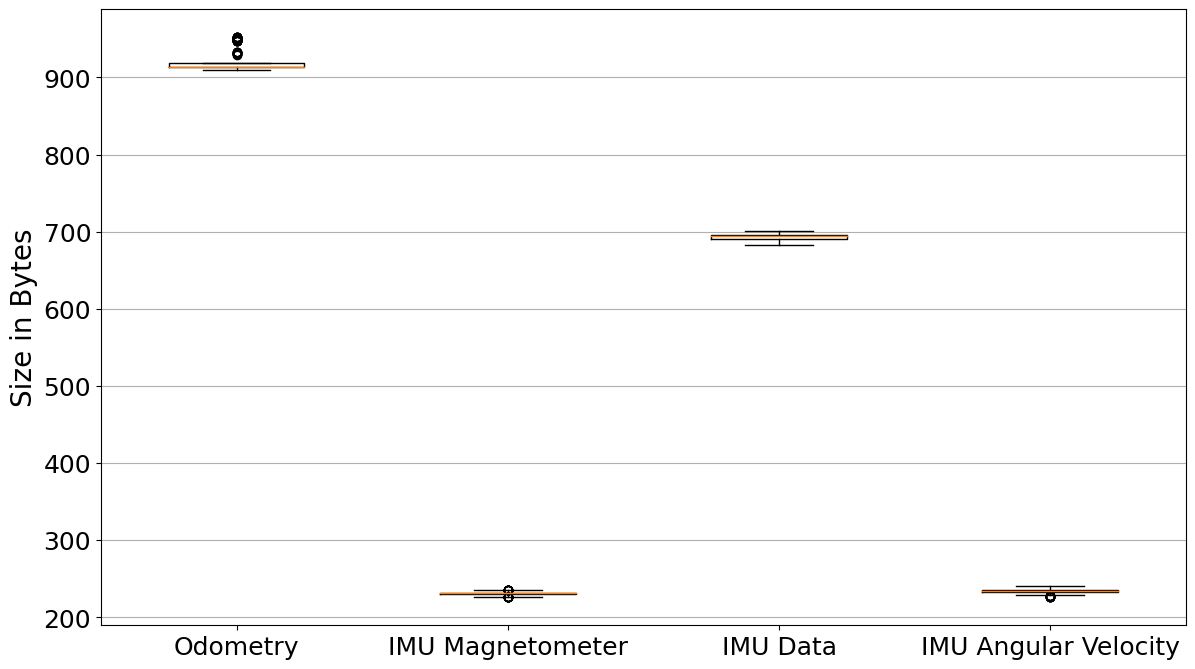

In [18]:
import sys
import matplotlib.pyplot as plt


def calculate_block_sizes(data):
    header_blocks = data.strip().split('---')
    header_sizes = []
 

    for block in header_blocks:
        if block:
            header_sizes.append(sys.getsizeof(block))

    
    print(f"Total Records: {len(header_sizes)}" )
    print(header_sizes)

    return header_sizes

def plot_box_plot(header_sizes_list, file_names):
    #plt.style.use('seaborn-white')  # Change the box plot style
    fig, ax = plt.subplots(figsize=(14, 8))  # Adjust the figure size
    ax.boxplot(header_sizes_list, labels=file_names, widths=0.5)
    #ax.set_title('Merkle Tree Leaf Hash', fontsize=20)
    #ax.set_title('ROS messages', fontsize=20)
    ax.set_ylabel('Size in Bytes', fontsize=20)
    ax.tick_params(axis='both', labelsize=18)
    ax.grid(axis='y')  # Add gridlines

    plt.show()

#get the data
odom_data, imu_mag_data, imu_data, imu_angular_velocity = get_data()

file_names = [odom_data, imu_mag_data, imu_data,imu_angular_velocity]
file_labels = {
    odom_data : 'Odometry',
    imu_mag_data : 'IMU Magnetometer',
    imu_data: 'IMU Data',
    imu_angular_velocity: 'IMU Angular Velocity',
}

header_sizes_list = []
labels = []

for file_name in file_names:
    data = file_name
    header_sizes = calculate_block_sizes(data)
    header_sizes_list.append(header_sizes)
    labels.append(file_labels[file_name])


#print(header_sizes_list[0])

plot_box_plot(header_sizes_list, labels)

#Merkle Tree Leaf Hash Time

In [19]:
!pip install merkletools

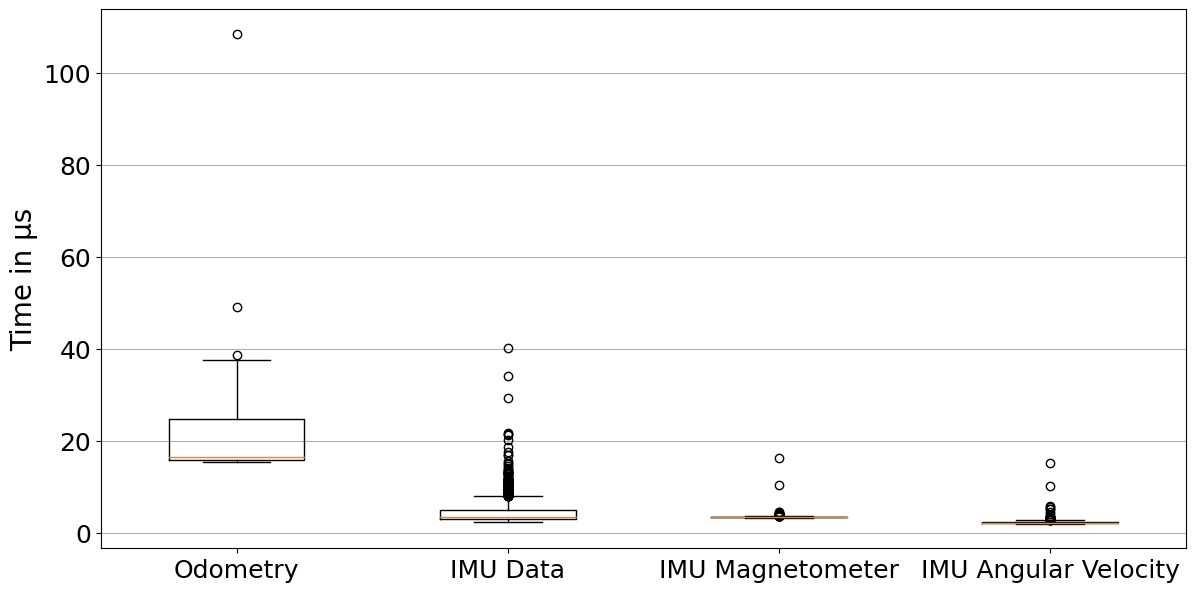

In [20]:
import sys
import matplotlib.pyplot as plt
from merkletools import MerkleTools
import time


def calculate_hash_time(data):
    mt = MerkleTools(hash_type="sha256")
    header_blocks = data.strip().split('---')
    header_times = []

    for block in header_blocks:
        if block:
            #get time
            start = time.process_time()
            mt.add_leaf(block, True)
            header_times.append((time.process_time() - start)*1000000)  
            
    #tree creation time
    #start = time.process_time()
    #mt.make_tree()
    #header_times.append((time.process_time() - start)*1e6) #last append == tree creation time
            
    return header_times
    
def plot_box_plot(header_sizes_list, file_names):
    #plt.style.use('seaborn-white')  # Change the box plot style
    fig, ax = plt.subplots(figsize=(14, 7))  # Adjust the figure size
    ax.boxplot(header_sizes_list, labels=file_names, widths=0.5)
    #ax.set_title('Merkle Tree Leaf Hash', fontsize=20)
    ax.set_ylabel('Time in µs', fontsize=20)
    ax.tick_params(axis='both', labelsize=18)
    ax.grid(axis='y')  # Add gridlines

    plt.savefig("merkle-tree-leaf-time" + ".png", bbox_inches='tight') # Save the plot as a PDF
    plt.show()

#get the data
odom_data, imu_mag_data, imu_data, imu_angular_velocity = get_data()

file_names = [odom_data, imu_mag_data, imu_data,imu_angular_velocity]
file_labels = {
    odom_data : 'Odometry',
    imu_mag_data : 'IMU Data',
    imu_data: 'IMU Magnetometer',
    imu_angular_velocity: 'IMU Angular Velocity',
}

header_hashes_list = []
labels = []

#reads all files
for file_name in file_names:
    data = file_name
    #vector with hash calculation times
    header_hash_time = calculate_hash_time(data)
    #print(header_hash_time)
    header_hashes_list.append(header_hash_time)
    labels.append(file_labels[file_name])
    
plot_box_plot(header_hashes_list, labels)
    
